# KNN

## 1. Cargar la data

In [23]:
# Importamos las librerías necesarias.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

import matplotlib.pyplot as plt

In [5]:
#Cargamos la data en un objeto.
iris = load_iris()

In [34]:
#Vemos como viene la data
#print(iris.data)
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

#### [sepal length, sepal width, petal length, petal width]

In [36]:
print(type(iris.data))

<class 'numpy.ndarray'>


In [11]:
#Separamos la variable objetivo del dataset

X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

## 2. EDA

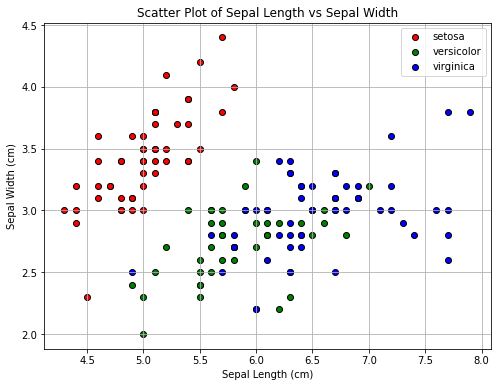

In [20]:
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i in range(len(colors)):
    plt.scatter(X[y == i, 0], X[y == i, 1], c=colors[i], label=target_names[i], edgecolor='k')
#(Longitu de sepalo, ancho de sépalo)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.legend()
plt.grid(True)

## 3. Dividimos la Data

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=4)

## 4. Verificamos cual es el numero optimos de k

In [27]:
#Vamos a correr desde 1 vecino hasta 25 vecinos y medirmeos su precision al clasificar
scores = {}
scores_list = []

for k in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))
    
print("Scores: ", scores)
print("Scores List: ", scores_list)

Scores:  {1: 0.9333333333333333, 2: 0.9333333333333333, 3: 0.9666666666666667, 4: 0.9666666666666667, 5: 0.9666666666666667, 6: 0.9666666666666667, 7: 0.9666666666666667, 8: 0.9666666666666667, 9: 0.9666666666666667, 10: 0.9666666666666667, 11: 0.9666666666666667, 12: 0.9666666666666667, 13: 0.9666666666666667, 14: 0.9666666666666667, 15: 0.9666666666666667, 16: 0.9666666666666667, 17: 0.9666666666666667, 18: 0.9666666666666667, 19: 0.9666666666666667, 20: 0.9333333333333333, 21: 0.9666666666666667, 22: 0.9333333333333333, 23: 0.9666666666666667, 24: 0.9666666666666667, 25: 0.9666666666666667}
Scores List:  [0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.93

## 5. Graficamos

Text(0, 0.5, 'Testing Accuracy')

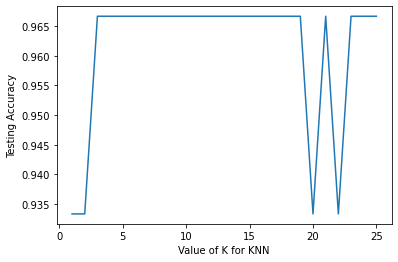

In [28]:
# Plot the relationship between K and the testing accuracy
plt.plot(range(1,26), scores_list)

plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

#### Aqui el mas óptimo sería 5

## 6. Ajustamos el modelo y predecimos.

In [31]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: ", accuracy)

Accuracy:  0.9666666666666667


## 7. Predecimos sobre nuevos datos

In [32]:
new_flower = [[5.1, 3.5, 1.4, 0.2]]
prediction = knn.predict(new_flower)
species = iris.target_names
print("Prediction: ", species[prediction[0]])

Prediction:  setosa
